In [1]:
from ultralytics import YOLO
import os
import itertools
import numpy as np

In [2]:
# Initialize YOLO model
model = YOLO("yolov8m.pt")

# Directory containing images for frequency/probability calculation
frequency_image_dir_1 = "/home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/train/images/1"
frequency_image_dir_0 = "/home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/train/images/0"
total_score_image_dir_0="/home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/validation/images/0"
total_score_image_dir_1="/home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/validation/images/1"

# Initialize dictionary to store object frequencies
object_frequencies = {}
pair_frequencies = {}

def update_frequencies(image_dir, increment=True):
    for image_file in os.listdir(image_dir):
        if image_file.endswith(".png") or image_file.endswith(".jpg") or image_file.endswith(".jpeg"):
            try:
                # Predict objects in the current image
                results = model.predict(os.path.join(image_dir, image_file))
                result = results[0]  # Assuming there's only one result
                # Iterate over detected boxes in the current image
                detected_objects = [result.names[box.cls[0].item()] for box in result.boxes]
                # Update object frequency dictionary
                for obj in detected_objects:
                    object_frequencies[obj] = object_frequencies.get(obj, 0) + (1 if increment else -1)
                # Update pair frequency dictionary
                for pair in itertools.combinations(detected_objects, 2):
                    pair_key = tuple(sorted(pair))
                    pair_frequencies[pair_key] = pair_frequencies.get(pair_key, 0) + (1 if increment else -1)
            except Exception as e:
                print(f"Error processing image {image_file}: {e}")

# Update frequencies for directory 1
update_frequencies(frequency_image_dir_1, increment=True)

# Update frequencies for directory 0
update_frequencies(frequency_image_dir_0, increment=False)

# Calculate probabilities for objects and pairs
# total_pairs = sum(pair_frequencies.values())
# total_objects = sum(object_frequencies.values())

# object_probabilities = {obj: freq / total_objects for obj, freq in object_frequencies.items()}
# pair_probabilities = {pair: freq / total_pairs for pair, freq in pair_frequencies.items()}

print("\n")


image 1/1 /home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/train/images/1/90583.png: 448x640 1 person, 269.9ms
Speed: 3.6ms preprocess, 269.9ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/train/images/1/96802.png: 448x640 1 person, 312.9ms
Speed: 2.0ms preprocess, 312.9ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/train/images/1/51964.png: 640x576 1 person, 1 car, 1 truck, 314.0ms
Speed: 2.1ms preprocess, 314.0ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/train/images/1/69308.png: 416x640 (no detections), 225.7ms
Speed: 1.8ms preprocess, 225.7ms inference, 0.4ms postprocess per image at shape (1, 3,

In [3]:
print(object_frequencies)
print("\n")
print(pair_frequencies)

{'person': 267, 'car': 3, 'truck': 3, 'cell phone': -8, 'sheep': -38, 'horse': 4, 'chair': -8, 'book': 6, 'surfboard': 1, 'bottle': -13, 'boat': 4, 'hot dog': 14, 'dining table': -3, 'knife': 0, 'fork': 1, 'bench': 7, 'cup': -19, 'tie': 1, 'handbag': -4, 'potted plant': 2, 'couch': -5, 'toothbrush': 4, 'sports ball': 2, 'bowl': -11, 'cake': 7, 'spoon': 4, 'backpack': -1, 'baseball bat': 5, 'dog': -18, 'suitcase': 2, 'bird': -5, 'elephant': 0, 'teddy bear': -4, 'frisbee': -3, 'apple': 0, 'donut': 1, 'airplane': -1, 'sink': 0, 'scissors': 3, 'oven': -4, 'baseball glove': 1, 'bear': -6, 'cat': -14, 'bed': -8, 'motorcycle': 3, 'bus': -2, 'laptop': 3, 'traffic light': -2, 'skis': 1, 'bicycle': 1, 'train': 1, 'umbrella': 1, 'clock': -7, 'tennis racket': 11, 'cow': -4, 'tv': 2, 'vase': 1, 'banana': -4, 'keyboard': 0, 'refrigerator': -1, 'remote': -1, 'kite': -6, 'sandwich': 1, 'pizza': -1, 'microwave': 0, 'toilet': 1, 'wine glass': -7, 'giraffe': -2, 'carrot': -5, 'orange': -4, 'fire hydrant'

In [4]:
list_0=[]

for image_file in os.listdir(total_score_image_dir_0):
    if image_file.endswith(".png") or image_file.endswith(".jpg") or image_file.endswith(".jpeg"):
        # Predict objects in the current image
        results = model.predict(os.path.join(total_score_image_dir_0, image_file))
        result = results[0]  # Assuming there's only one result
        # Iterate over detected boxes in the current image
        detected_objects = [result.names[box.cls[0].item()] for box in result.boxes]
        list1=[]
        list2=[]
        # Update object frequency dictionary
        for obj in detected_objects:
            if obj not in object_frequencies:
                list1.append(0)
            else:
                list1.append(object_frequencies[obj])
        # Update pair frequency dictionary
        for pair in itertools.combinations(detected_objects, 2):
            pair_key = tuple(sorted(pair))
            if pair_key not in pair_frequencies:
                list2.append(0)
            else:
                list2.append(pair_frequencies[pair_key])


        first_avg=np.sum(list1)
        second_avg=np.sum(list2)

        final_ans=(2*second_avg+first_avg)/3

        list_0.append(final_ans)

list_1=[]

for image_file in os.listdir(total_score_image_dir_1):
    if image_file.endswith(".png") or image_file.endswith(".jpg") or image_file.endswith(".jpeg"):
        # Predict objects in the current image
        results = model.predict(os.path.join(total_score_image_dir_1, image_file))
        result = results[0]  # Assuming there's only one result
        # Iterate over detected boxes in the current image
        detected_objects = [result.names[box.cls[0].item()] for box in result.boxes]
        list1=[]
        list2=[]
        # Update object frequency dictionary
        for obj in detected_objects:
            if obj not in object_frequencies:
                list1.append(0)
            else:
                list1.append(object_frequencies[obj])
        # Update pair frequency dictionary
        for pair in itertools.combinations(detected_objects, 2):
            pair_key = tuple(sorted(pair))
            if pair_key not in pair_frequencies:
                list2.append(0)
            else:
                list2.append(pair_frequencies[pair_key])


        first_avg=np.sum(list1)
        second_avg=np.sum(list2)

        final_ans=(2*second_avg+first_avg)/3

        list_1.append(final_ans)



image 1/1 /home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/validation/images/0/17265.png: 448x640 3 dogs, 309.7ms
Speed: 2.2ms preprocess, 309.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/validation/images/0/18726.png: 448x640 1 person, 1 chair, 1 bed, 234.4ms
Speed: 2.5ms preprocess, 234.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/validation/images/0/59170.png: 480x640 2 persons, 1 bottle, 4 pizzas, 275.6ms
Speed: 2.4ms preprocess, 275.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/lenovo/Documents/Computer Vision/streamlit-hatefulmemedection-main/dataset_hate/validation/images/0/98547.png: 416x640 9 persons, 231.3ms
Speed: 2.0ms preprocess, 231.3ms inference, 0.8ms post

90.0
164.0
5613.524904214558
12152.061302681992
119419.0
169550.0
-265.0
-140.66666666666666
Number of values less than 5613.524904214558: 70
87


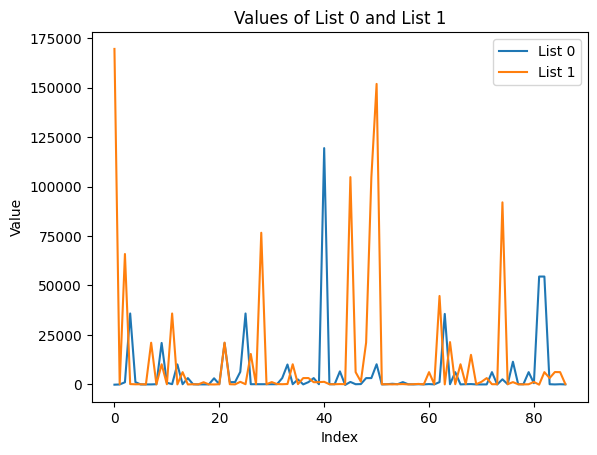

In [14]:
import math
import matplotlib.pyplot as plt

def count_values_less_than_threshold(lst, threshold):
    count = sum(1 for value in lst if value < threshold)
    print(f"Number of values less than {threshold}: {count}")

for i in range(len(list_0)):
    if math.isnan(list_0[i]):
        list_0[i]=0

for i in range(len(list_1)):
    if math.isnan(list_1[i]):
        list_1[i]=0

list_0=list_0[0:87]

print(np.median(list_0))
print(np.median(list_1))

print(np.mean(list_0))
print(np.mean(list_1))

print(np.max(list_0))
print(np.max(list_1))

print(np.min(list_0))
print(np.min(list_1))

count_values_less_than_threshold(list_0, np.mean(list_0))
print(len(list_1))

# Define your lists list_0 and list_1

plt.plot(range(len(list_0)), list_0, label='List 0')
plt.plot(range(len(list_1)), list_1, label='List 1')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Values of List 0 and List 1')
plt.legend()
plt.show()
